# Enyzme prediction classes

[All proteins from SwissProt](https://www.uniprot.org/uniprot/?query=*&fil=reviewed:yes)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 20]


In [18]:
from pathlib import Path
datadir = Path('/Volumes/GoogleDrive/Shared drives/AlphaEnzyme/data')
swiss = pd.read_csv(datadir / 'uniprot-filtered-reviewed_yes.tab.gz', sep='\t')
swiss

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,EC number,Sequence
0,P94485,YNAG_BACSU,reviewed,Uncharacterized protein YnaG,ynaG BSU17550,Bacillus subtilis (strain 168),91,NaN,MNVKKAAAVFSITIPIISAILIINFFTGFMSIPWQGMPVFFPLLLS...
1,Q7CPU9,ZAPA_SALTY,reviewed,Cell division protein ZapA (Z ring-associated ...,zapA STM3060,Salmonella typhimurium (strain LT2 / SGSC1412 ...,109,NaN,MSAQPVDIQIFGRSLRVNCPPDQRDALNQAADDLNQRLQDLKVRTR...
2,Q802Y8,ZB16A_DANRE,reviewed,Zinc finger and BTB domain-containing protein ...,zbtb16a plzfa zbtb16 zgc:55675,Danio rerio (Zebrafish) (Brachydanio rerio),671,NaN,MDLTKMGMIQLQNPNHPNALLHKANQMRLAGTLCDVVIMVDSQEFH...
3,Q04731,YPEC_LACLC,reviewed,Uncharacterized protein in pepC 5'region (ORF ...,NaN,Lactococcus lactis subsp. cremoris (Streptococ...,195,NaN,AEQLVIDYSEKSVIVQKEKLIAKNTDENLKLIFTDGVQQKEINQFI...
4,B5FMZ7,YOHJ_SALDC,reviewed,UPF0299 membrane protein YohJ,yohJ SeD_A2528,Salmonella dublin (strain CT_02021853),132,NaN,MSKSLNIIWQYIRAFVLIYACLYAGIFLASLLPITIPGSIIGMLIL...
...,...,...,...,...,...,...,...,...,...
565923,Q81TQ8,SPXH_BACAN,reviewed,ClpXP adapter protein SpxH,spxH BA_1208 GBAA_1208 BAS1115,Bacillus anthracis,297,NaN,MDKQEAKHINMPSPSACEYKSVEAYLFIDPLCKDCWEIEPFIIKLW...
565924,Q66I14,SPS3_DANRE,reviewed,"Selenide, water dikinase 3 (EC 2.7.9.3) (Selen...",sephs3 sephs2 sps2 zgc:92096,Danio rerio (Zebrafish) (Brachydanio rerio),447,2.7.9.3,MSGSEPPSGDSGGAGGYAVFYPAGYQALNPEEHGLDRGFRLTAFSD...
565925,Q04398,SPG3_YEAST,reviewed,Stationary phase protein 3,SPG3 YDR504C D9719.10,Saccharomyces cerevisiae (strain ATCC 204508 /...,127,NaN,MICYFLVVTINFLKEKTTICHYFVNIFSLFLFLFVFVFVFIFVYFF...
565926,Q680N1,SPH12_ARATH,reviewed,S-protein homolog 12,SPH12 At5g26060 T1N24.10,Arabidopsis thaliana (Mouse-ear cress),154,NaN,MGTNKIPKTLNGNLVLILIITIMMVTHSHGFQLEIRNELSGRYRKL...


In [19]:
ec_swiss = swiss[swiss['EC number'].notnull()]
ec_swiss['EC4']  = ec_swiss['EC number'].str.split(';')
ec_swiss = ec_swiss.explode('EC4', ignore_index=True)
ec_swiss['EC4'] = ec_swiss['EC4'].str.strip()
ec_swiss

/tmp/ipykernel_72000/3721738787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ec_swiss['EC4']  = ec_swiss['EC number'].str.split(';')


,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,EC number,Sequence,EC4
0,A1ADU8,YPEA_ECOK1,reviewed,Acetyltransferase YpeA (EC 2.3.1.-),ypeA Ecok1_23440 APECO1_4114,Escherichia coli O1:K1 / APEC,141,2.3.1.-,MEIRVFRQEDFEEVITLWERCDLLRPWNDPEMDIERKMNHDVSLFL...,2.3.1.-
1,Q7VRG7,YQGF_BLOFL,reviewed,Putative pre-16S rRNA nuclease (EC 3.1.-.-),yqgF Bfl250,Blochmannia floridanus,142,3.1.-.-,MIKKIAIIMAFDFGTKKIGIAIGQKITGTTQSLEILPSKFGIPNWK...,3.1.-.-
2,B0T191,YQGF_CAUSK,reviewed,Putative pre-16S rRNA nuclease (EC 3.1.-.-),Caul_1518,Caulobacter sp. (strain K31),164,3.1.-.-,MPVLDIAEFAAAIPDYLPIVGLDPGEKTIGVAVSDVTLTVASPLAL...,3.1.-.-
3,A8AZS9,YQGF_STRGC,reviewed,Putative pre-16S rRNA nuclease (EC 3.1.-.-),SGO_2041,Streptococcus gordonii (strain Challis / ATCC ...,139,3.1.-.-,MRIMGLDVGSKTVGVAISDPLGFTAQGLEIIQINEDQEEFGFERLG...,3.1.-.-
4,Q8VQK7,Y1034_BRUAB,reviewed,Putative peptide import ATP-binding protein Br...,BruAb2_1034,Brucella abortus biovar 1 (strain 9-941),334,7.4.2.-,MSDVMTANRRSFLAEDGKETIVRTDDLVRDFDLGHRPEGGRLVLRA...,7.4.2.-
...,...,...,...,...,...,...,...,...,...,...
295925,O17795,STDH2_CAEEL,reviewed,Putative steroid dehydrogenase 2 (EC 1.1.1.-),stdh-2 F11A5.12,Caenorhabditis elegans,315,1.1.1.-,MDIQWFATGVGAAVVLYIFYHFIRIILNILVPYAFCQPIDLKKKAG...,1.1.1.-
295926,Q7SHI5,SRDB_NEUCR,reviewed,Cupin-domain-containing oxidoreductase srdB (E...,srdB NCU02919,Neurospora crassa (strain ATCC 24698 / 74-OR23...,196,1.-.-.-,MSTSGPITEFPAPGLRDPFRYITGHDAEGNAVFVQTDNGDHRAVML...,1.-.-.-
295927,Q8RY24,SPSA3_ARATH,reviewed,Probable sucrose-phosphate synthase 3 (EC 2.4....,SPS3 SPSB At1g04920 F13M7.9,Arabidopsis thaliana (Mouse-ear cress),1062,2.4.1.14,MAGNEWINGYLEAILDSQAQGIEETQQKPQASVNLREGDGQYFNPT...,2.4.1.14
295928,P49031,SPSA_BETVU,reviewed,Probable sucrose-phosphate synthase (EC 2.4.1....,SPS,Beta vulgaris (Sugar beet),1045,2.4.1.14,MAGNDWINSYLEAILDVGPGLDDAKSSLLLRERGRFSPTRYFVEEV...,2.4.1.14


In [5]:
for i in range(3):
    ec_swiss[f'EC{i+1}'] = ec_swiss['EC4'].str.rsplit('.',3 -i ).str.get(0)
ec_swiss['EC3']

0         2.3.1
1         3.1.-
2         3.1.-
3         3.1.-
4         7.4.2
          ...  
295925    1.1.1
295926    1.-.-
295927    2.4.1
295928    2.4.1
295929    2.7.9
Name: EC3, Length: 295930, dtype: object

In [20]:
ec_swiss.to_csv(datadir / 'swissprot_EC.tab.gz', compression='gzip', sep='\t')

mv: rename swissprot_EC.tab.gz to ../../data/swissprot_EC.tab.gz: No such file or directory


In [63]:
ec1 = ec_swiss.groupby('EC1').count()
ec1

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,EC number,Sequence,EC4,EC2,EC3
EC1,,,,,,,,,,,,
1,36745,36745,36745,36745,35946,36745,36745,36745,36745,36745,36745,36745
2,104422,104422,104422,104422,103053,104422,104422,104422,104422,104422,104422,104422
3,67871,67871,67871,67871,64345,67871,67871,67871,67871,67871,67871,67871
4,26797,26797,26797,26797,26244,26797,26797,26797,26797,26797,26797,26797
5,16097,16097,16097,16097,15989,16097,16097,16097,16097,16097,16097,16097
6,29229,29229,29229,29229,29168,29229,29229,29229,29229,29229,29229,29229
7,14769,14769,14769,14769,14712,14769,14769,14769,14769,14769,14769,14769


,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,EC number,Sequence,EC4,EC1,EC3
EC2,,,,,,,,,,,,
1.-,1512,1512,1512,1512,1485,1512,1512,1512,1512,1512,1512,1512
1.1,9143,9143,9143,9143,8972,9143,9143,9143,9143,9143,9143,9143
1.10,634,634,634,634,605,634,634,634,634,634,634,634
1.11,1345,1345,1345,1345,1220,1345,1345,1345,1345,1345,1345,1345
1.12,146,146,146,146,138,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...,...,...,...
7.2,1079,1079,1079,1079,1071,1079,1079,1079,1079,1079,1079,1079
7.3,681,681,681,681,680,681,681,681,681,681,681,681
7.4,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200


<AxesSubplot:ylabel='EC2'>

<Figure size 288x1296 with 0 Axes>

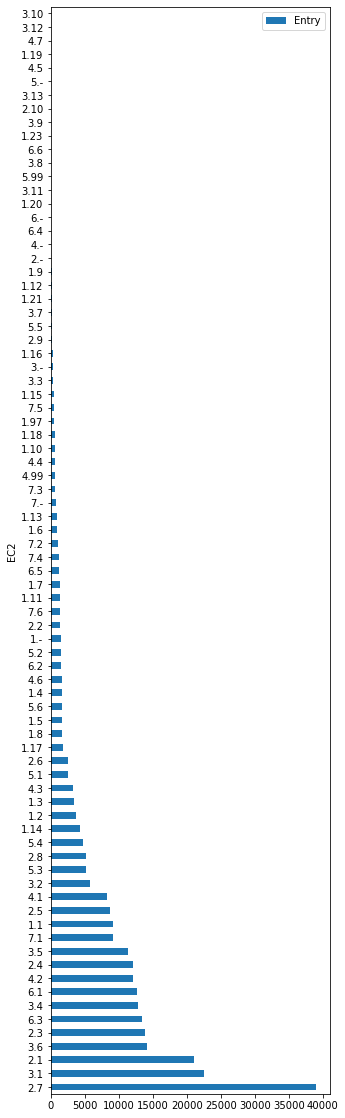

In [91]:

ec2 = ec_swiss.groupby('EC2').count()
display(ec2)
plt.figure(1, figsize=(4, 18)) # Figure size in inches (size_x, size_y)

ec2.sort_values('Entry', ascending=False).head(100).plot.barh(y='Entry')

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,EC number,Sequence,EC4,EC1,EC2
EC3,,,,,,,,,,,,
2.1.1,15428,15428,15428,15428,15126,15428,15428,15428,15428,15428,15428,15428
2.7.7,14712,14712,14712,14712,14095,14712,14712,14712,14712,14712,14712,14712
6.1.1,12744,12744,12744,12744,12734,12744,12744,12744,12744,12744,12744,12744
2.3.1,10321,10321,10321,10321,10250,10321,10321,10321,10321,10321,10321,10321
2.5.1,8732,8732,8732,8732,8640,8732,8732,8732,8732,8732,8732,8732
...,...,...,...,...,...,...,...,...,...,...,...,...
1.5.7,1,1,1,1,1,1,1,1,1,1,1,1
1.17.9,1,1,1,1,1,1,1,1,1,1,1,1
1.18.-,1,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:ylabel='EC3'>

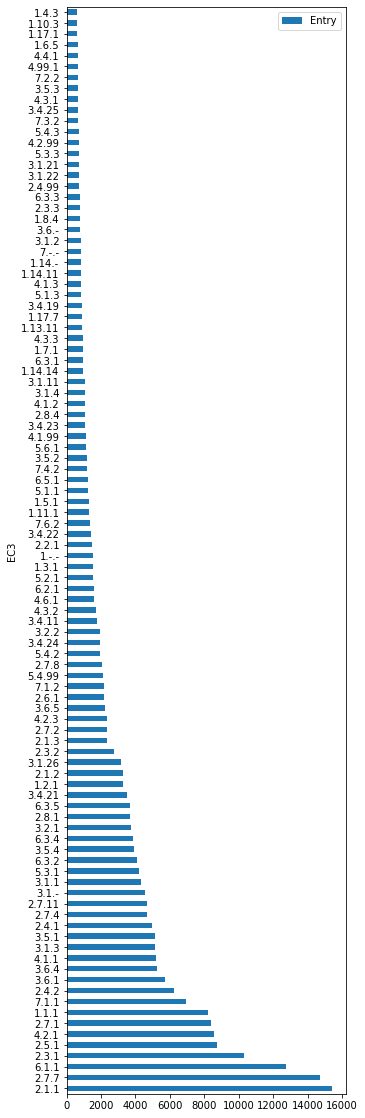

In [94]:
ec3 = ec_swiss.groupby('EC3').count().sort_values('Entry',ascending=False)
display(ec3)
ec3.head(100).plot.barh(y='Entry')

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,EC number,Sequence,EC1,EC2,EC3
EC4,,,,,,,,,,,,
7.1.1.-,4638,4638,4638,4638,4637,4638,4638,4638,4638,4638,4638,4638
3.1.-.-,4525,4525,4525,4525,4483,4525,4525,4525,4525,4525,4525,4525
2.7.7.6,3971,3971,3971,3971,3960,3971,3971,3971,3971,3971,3971,3971
2.1.1.-,2775,2775,2775,2775,2688,2775,2775,2775,2775,2775,2775,2775
2.7.11.1,2612,2612,2612,2612,2595,2612,2612,2612,2612,2612,2612,2612
...,...,...,...,...,...,...,...,...,...,...,...,...
2.1.1.192,637,637,637,637,637,637,637,637,637,637,637,637
5.4.99.12,630,630,630,630,630,630,630,630,630,630,630,630
2.1.1.182,624,624,624,624,624,624,624,624,624,624,624,624


<AxesSubplot:ylabel='EC4'>

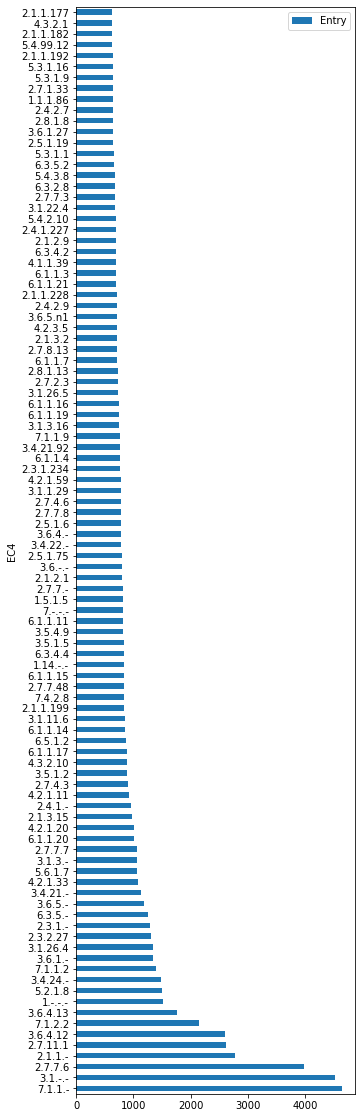

In [99]:
ec4 = ec_swiss.groupby('EC4').count().sort_values('Entry', ascending=False)
display(ec4.head(100))
ec4.head(100).plot.barh(y='Entry')

In [70]:
ec_swiss.groupby(['EC1','EC2', 'EC3','EC4']).count()

Entry  Entry name  Status  Protein names  Gene names  \
EC1 EC2 EC3   EC4                                                              
1   1.- 1.-.- 1.-.-.-    1512        1512    1512           1512        1485   
    1.1 1.1.- 1.1.-.-     206         206     206            206         205   
        1.1.1 1.1.1.-     533         533     533            533         514   
              1.1.1.1     242         242     242            242         223   
              1.1.1.10     10          10      10             10          10   
...                       ...         ...     ...            ...         ...   
7   7.6 7.6.2 7.6.2.4       2           2       2              2           2   
              7.6.2.5     132         132     132            132         132   
              7.6.2.7      46          46      46             46          46   
              7.6.2.8      54          54      54             54          54   
              7.6.2.9       5           5       5              5           5   

                        Organism  Length  EC number  Sequence  
EC1 EC2 EC3   EC4                                              
1   1.- 1.-.- 1.-.-.-       1512    1512       1512      1512  
    1.1 1.1.- 1.1.-.-        206     206        206       206  
        1.1.1 1.1.1.-        533     533        533       533  
              1.1.1.1        242     242        242       242  
              1.1.1.10        10      10         10        10  
...                          ...     ...        ...       ...  
7   7.6 7.6.2 7.6.2.4          2       2          2         2  
              7.6.2.5        132     132        132       132  
              7.6.2.7         46      46         46        46  
              7.6.2.8         54      54         54        54  
              7.6.2.9          5       5          5         5  

[5487 rows x 9 columns]